In [1]:
import random
import numpy as np
import pandas as pd
from scipy.stats import bootstrap#, permutation_test
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('movieRatingsData.csv')
data = data.apply(pd.to_numeric, errors='coerce') # makes sure all strings are converted to floats
data.head()

,10 things I hate about you (1999),12 Monkeys (1995),13 going on 30 (2004),21 Grams (2003),25th hour (2002),28 days later (2002),3000 Miles to Graceland (2001),8 Mile (2002),A Night at the Roxbury (1998),A time to kill (1996),...,Toy Story (1995),Toy Story 2 (1999),Unforgiven (1992),What Lies Beneath (2000),What Women Want (2000),Wild Wild West (1999),Wing Commander (1999),X-Men (2000),X2 (2003),Zoolander (2001)
0,3.5,3.5,NaN,3.0,4.0,NaN,NaN,3.0,NaN,2.5,...,3.5,3.5,4.0,NaN,2.5,NaN,NaN,3.5,3.0,2.5
1,4.0,NaN,3.5,NaN,NaN,NaN,NaN,3.0,2.5,3.5,...,3.5,NaN,2.0,NaN,3.0,NaN,NaN,NaN,2.0,1.0
2,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
3,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0
4,1.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,3.5,NaN,...,3.0,2.5,3.0,2.5,1.0,1.5,NaN,2.5,2.0,3.5


In [3]:
reservoir_dogs = data['Reservoir Dogs (1992)'].dropna().to_numpy()
good_will_hunting = data['Good Will Hunting (1997)'].dropna().to_numpy()
pulp_fiction = data['Pulp Fiction (1994)'].dropna().to_numpy()
magnolia = data['Magnolia (1999)'].dropna().to_numpy()
mulholland_dr = data['Mulholland Dr. (2001)'].dropna().to_numpy()
zoolander = data['Zoolander (2001)'].dropna().to_numpy()
saving_private_ryan = data['Saving Private Ryan (1998)'].dropna().to_numpy()
unforgiven = data['Unforgiven (1992)'].dropna().to_numpy()
big_fish = data['Big Fish (2003)'].dropna().to_numpy()

p-val: 0.0


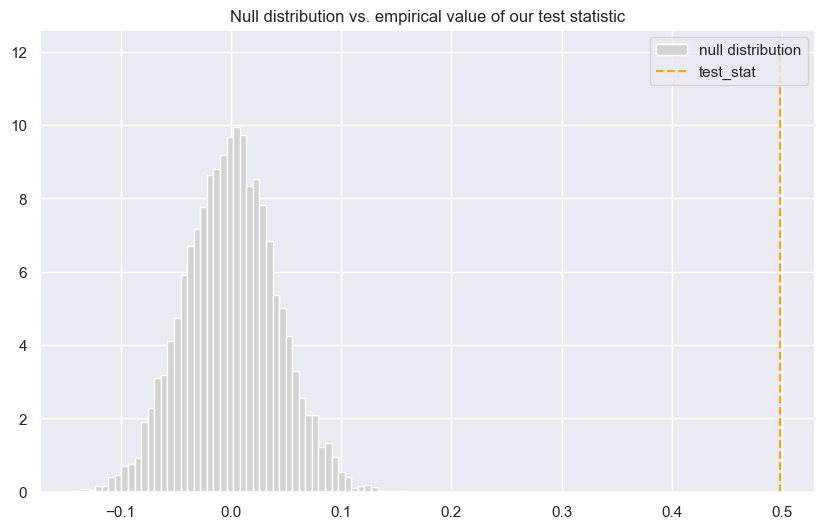

In [4]:
movie1 = pulp_fiction
movie2 = magnolia
test_stat = np.mean(movie1) - np.mean(movie2)
num_reps = int(1e4)
joint_data = np.concatenate((movie1, movie2))
n1 = len(movie1)
n2 = len(joint_data)
rng = np.random.default_rng(69420)
shuffled_stats = []
for i in range(num_reps):
    shuffled_indices = rng.permutation(n2)
    shuffled_group_1 = joint_data[shuffled_indices[:n1]]
    shuffled_group_2 = joint_data[shuffled_indices[n1:]]
    shuffled_stats.append(np.mean(shuffled_group_1) - np.mean(shuffled_group_2))
p_val = len(np.argwhere(shuffled_stats>=test_stat))/num_reps
print('p-val:', p_val)
plt.figure(figsize=(10,6))
plt.hist(shuffled_stats, bins=50, density=True, color='lightgrey', label='null distribution')
plt.vlines(test_stat, 0, 12, color='orange', ls='--', label='test_stat')
plt.title('Null distribution vs. empirical value of our test statistic')
plt.legend()
plt.show()


float64
Estimate offset: 0.00014464605356812044
BootstrapResult(confidence_interval=ConfidenceInterval(low=2.4199075552817044, high=2.527153816487397), standard_error=0.027140858358194107)


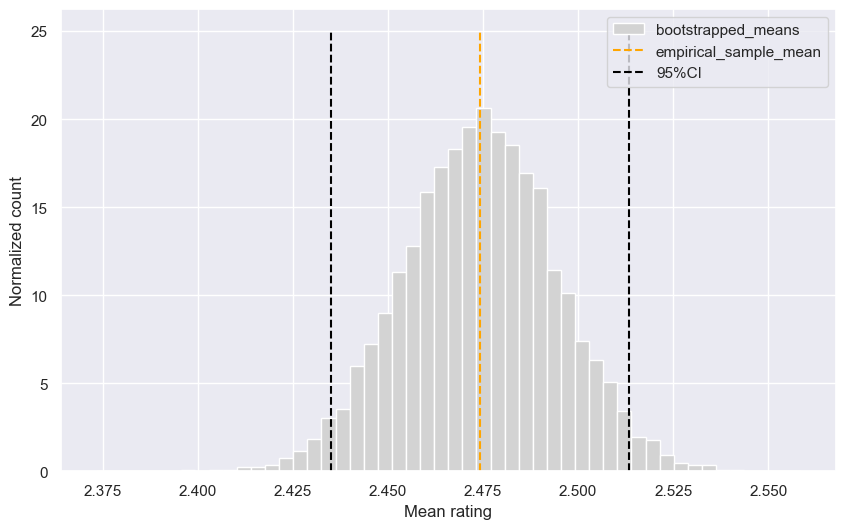

In [5]:
ratings_array = zoolander
print(ratings_array.dtype)
num_experiments = int(1e4)
n_samples = len(data)
rng = np.random.default_rng(69420)
bootstrapped_means = []
for i in range(num_experiments):
    random_idx = rng.integers(low=0, high=len(ratings_array), size=n_samples)
    bootstrapped_means.append(ratings_array[random_idx].mean())
lower_bound = np.sort(bootstrapped_means)[int(.025*len(bootstrapped_means))]
upper_bound = np.sort(bootstrapped_means)[int(.975*len(bootstrapped_means))]
print('Estimate offset:', np.mean(bootstrapped_means) - np.mean(ratings_array))
# input data has to be a sequence
bootstrap_ci = bootstrap((list(ratings_array),), np.mean, n_resamples = int(1e4), 
                         random_state=69420, confidence_level=0.95)
print(bootstrap_ci)
plt.figure(figsize=(10,6))
plt.hist(bootstrapped_means, bins=50, density=True, color='lightgrey', label='bootstrapped_means')
plt.vlines(np.mean(ratings_array), 0, 25, color='orange', ls='--', label='empirical_sample_mean')
plt.vlines(lower_bound, 0, 25, color='black', ls='--', label='95%CI')
plt.vlines(upper_bound, 0, 25, color='black', ls='--')
plt.xlabel('Mean rating')
plt.ylabel('Normalized count')
plt.legend()
plt.show()

int64
Estimate offset: 9.624630177285098e-05
BootstrapResult(confidence_interval=ConfidenceInterval(low=16.0, high=40.0), standard_error=6.306971747936004)


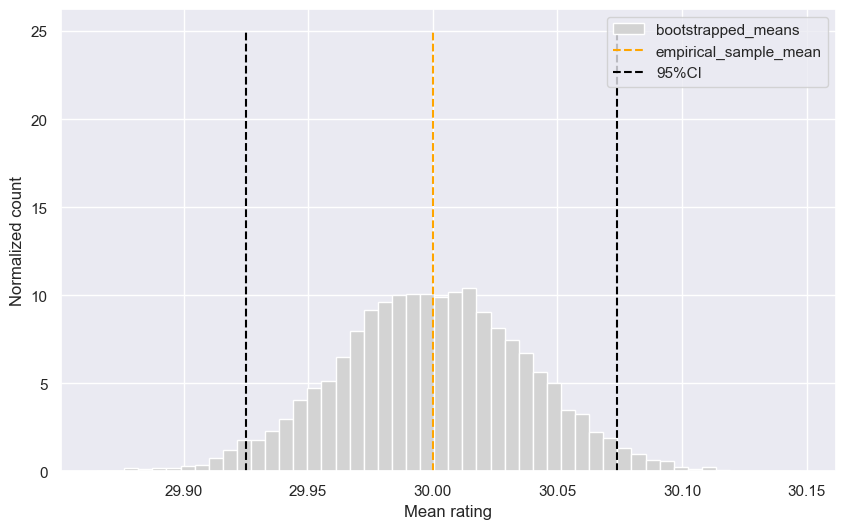

In [7]:
tables_waited = [10, 20, 30, 40, 50]
ratings_array = np.asarray(tables_waited)
print(ratings_array.dtype)
num_experiments = int(1e4)
n_samples = 52*52*52
rng = np.random.default_rng(69420)
bootstrapped_means = []
for i in range(num_experiments):
    random_idx = rng.integers(low=0, high=len(ratings_array), size=n_samples)
    bootstrapped_means.append(ratings_array[random_idx].mean())
lower_bound = np.sort(bootstrapped_means)[int(.025*len(bootstrapped_means))]
upper_bound = np.sort(bootstrapped_means)[int(.975*len(bootstrapped_means))]
print('Estimate offset:', np.mean(bootstrapped_means) - np.mean(ratings_array))
# input data has to be a sequence
bootstrap_ci = bootstrap((list(ratings_array),), np.mean, n_resamples = int(1e4), 
                         random_state=69420, confidence_level=0.95)
print(bootstrap_ci)
plt.figure(figsize=(10,6))
plt.hist(bootstrapped_means, bins=50, density=True, color='lightgrey', label='bootstrapped_means')
plt.vlines(np.mean(ratings_array), 0, 25, color='orange', ls='--', label='empirical_sample_mean')
plt.vlines(lower_bound, 0, 25, color='black', ls='--', label='95%CI')
plt.vlines(upper_bound, 0, 25, color='black', ls='--')
plt.xlabel('Mean rating')
plt.ylabel('Normalized count')
plt.legend()
plt.show()

In [27]:
data.shape

(3204, 209)

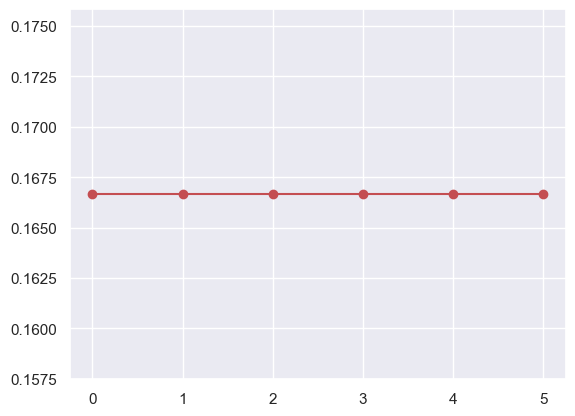

In [33]:
dice_faces = [1, 2, 3, 4, 5, 6]
p = 1/len(dice_faces)
def sum_dice(num_dice, dice_faces):
    min_end = num_dice * min(dice_faces)
    max_end = num_dice * max(dice_faces)
    range_end = max_end - min_end + 1
    event_count = np.zeros((range_end, 1))
    for k in range(range_end):
        event_count[k] = p**num_dice#(np.math.factorial(range_end)/(np.math.factorial(k) * np.math.factorial(range_end-k)))# * (p**k) * ((1-p)**(range_end-k))
    return min_end, max_end, event_count
min_end, max_end, event_count = sum_dice(1, dice_faces)

plt.plot(event_count, 'ro-')
plt.show()